# Working sheet
## 05 - Simple Cox regression
V05.01.00 - 2024-02-26

## Load data
Change the path and the filename in the following box.

Source of data:  Mayo Clinic trial in PBC conducted between 1974 and 1984

Data set pbc.csv

In [29]:
library(readr)
df <- read_csv("data/pbc.csv",
                 show_col_types = FALSE,
              na = c("", "."))

Look at the structure and the head of the dataset.

In [30]:
str(df)

spc_tbl_ [418 × 20] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id      : num [1:418] 1 2 3 4 5 6 7 8 9 10 ...
 $ time    : num [1:418] 400 4500 1012 1925 1504 ...
 $ status  : num [1:418] 2 0 2 2 1 2 0 2 2 2 ...
 $ trt     : num [1:418] 1 1 1 1 2 2 2 2 1 2 ...
 $ age     : num [1:418] 58.8 56.4 70.1 54.7 38.1 ...
 $ sex     : chr [1:418] "f" "f" "m" "f" ...
 $ ascites : num [1:418] 1 0 0 0 0 0 0 0 0 1 ...
 $ hepato  : num [1:418] 1 1 0 1 1 1 1 0 0 0 ...
 $ spiders : num [1:418] 1 1 0 1 1 0 0 0 1 1 ...
 $ edema   : num [1:418] 1 0 0.5 0.5 0 0 0 0 0 1 ...
 $ bili    : num [1:418] 14.5 1.1 1.4 1.8 3.4 0.8 1 0.3 3.2 12.6 ...
 $ chol    : num [1:418] 261 302 176 244 279 248 322 280 562 200 ...
 $ albumin : num [1:418] 2.6 4.14 3.48 2.54 3.53 3.98 4.09 4 3.08 2.74 ...
 $ copper  : num [1:418] 156 54 210 64 143 50 52 52 79 140 ...
 $ alk.phos: num [1:418] 1718 7395 516 6122 671 ...
 $ ast     : num [1:418] 137.9 113.5 96.1 60.6 113.2 ...
 $ trig    : num [1:418] 172 88 55 92 72 63 213 189 88 

In [31]:
head(df)

id,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,400,2,1,58.76523,f,1,1,1,1.0,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
2,4500,0,1,56.44627,f,0,1,1,0.0,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
3,1012,2,1,70.07255,m,0,0,0,0.5,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
4,1925,2,1,54.74059,f,0,1,1,0.5,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
5,1504,1,2,38.10541,f,0,1,1,0.0,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3
6,2503,2,2,66.25873,f,0,1,0,0.0,0.8,248,3.98,50,944.0,93.00,63,NA,11.0,3


Look at frequencies and descriptive statistics.

The summary() function is the first approach.

describe() from the Hmisc package is an alternative.

In [32]:
summary(df)

       id             time          status            trt       
 Min.   :  1.0   Min.   :  41   Min.   :0.0000   Min.   :1.000  
 1st Qu.:105.2   1st Qu.:1093   1st Qu.:0.0000   1st Qu.:1.000  
 Median :209.5   Median :1730   Median :0.0000   Median :1.000  
 Mean   :209.5   Mean   :1918   Mean   :0.8301   Mean   :1.494  
 3rd Qu.:313.8   3rd Qu.:2614   3rd Qu.:2.0000   3rd Qu.:2.000  
 Max.   :418.0   Max.   :4795   Max.   :2.0000   Max.   :2.000  
                                                 NA's   :106    
      age            sex               ascites            hepato      
 Min.   :26.28   Length:418         Min.   :0.00000   Min.   :0.0000  
 1st Qu.:42.83   Class :character   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :51.00   Mode  :character   Median :0.00000   Median :1.0000  
 Mean   :50.74                      Mean   :0.07692   Mean   :0.5128  
 3rd Qu.:58.24                      3rd Qu.:0.00000   3rd Qu.:1.0000  
 Max.   :78.44                      Max.   :1.00000   

In [33]:
library(Hmisc)
describe(df)

df 

 20  Variables      418  Observations
--------------------------------------------------------------------------------
id 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     418        0      418        1    209.5    139.7    21.85    42.70 
     .25      .50      .75      .90      .95 
  105.25   209.50   313.75   376.30   397.15 

lowest :   1   2   3   4   5, highest: 414 415 416 417 418
--------------------------------------------------------------------------------
time 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     418        0      399        1     1918     1253    245.1    606.8 
     .25      .50      .75      .90      .95 
  1092.8   1730.0   2613.5   3524.2   4040.6 

lowest :   41   43   51   71   77, highest: 4500 4509 4523 4556 4795
--------------------------------------------------------------------------------
status 
       n  missing distinct     Info     Mean      Gmd 
     418        0        3    0.772

Plot the variables of interest with a scatter plot matrix from package GGally.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


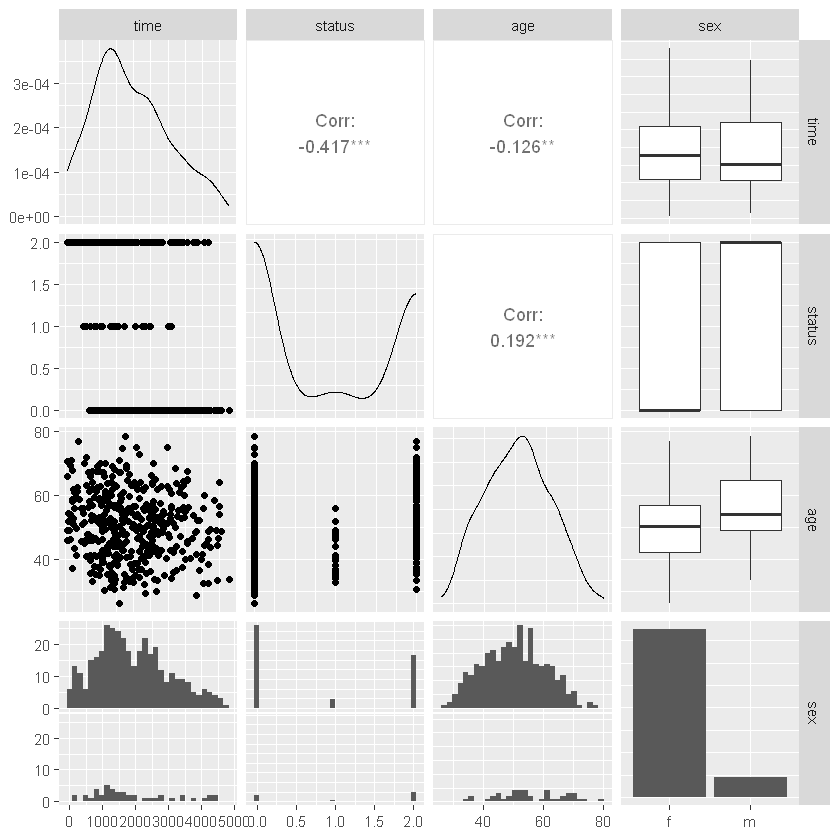

In [34]:
library(GGally)
library(tidyverse)
df1 <- df %>% dplyr::select(time, status, age, sex)
ggpairs(df1)

## Assumptions of Cox regression
-

TODO: Check completeness of the assumptions and add example code for the checks.

## Coding of categorical variables

- sex

If using character variables, the first level of the alphabetic sort order will be regardes as reference level.

For some functions the character variable has to be converted to a factor, e.g., for the contrasts() function.

In [35]:
table(df$sex)


  f   m 
374  44 

In [36]:
contrasts(as.factor(df$sex))

,m
f,0
m,1


## Fit the model

In [37]:
table(df$status, useNA = "always")


   0    1    2 <NA> 
 232   25  161    0 

In [38]:
library(survival)
df1 <- df %>% select(time, status, sex) %>% na.omit()
df1$status <- ifelse(df1$status == 0, 0, 1) # recode of status, all events equal 1, censored equal 0
my_cox <- coxph(formula = Surv(time, status) ~ sex, data = df1)

## Summary of the model

In [39]:
summary(my_cox)

Call:
coxph(formula = Surv(time, status) ~ sex, data = df1)

  n= 418, number of events= 186 

       coef exp(coef) se(coef)    z Pr(>|z|)  
sexm 0.3613    1.4353   0.2089 1.73   0.0836 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     exp(coef) exp(-coef) lower .95 upper .95
sexm     1.435     0.6967    0.9531     2.161

Concordance= 0.518  (se = 0.013 )
Likelihood ratio test= 2.75  on 1 df,   p=0.1
Wald test            = 2.99  on 1 df,   p=0.08
Score (logrank) test = 3.02  on 1 df,   p=0.08


## Estimates

In [40]:
library(broom)
tidy(my_cox)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
sexm,0.361347,0.2088782,1.729941,0.08364085


## Model fitness

In [41]:
glance(my_cox)

n,nevent,statistic.log,p.value.log,statistic.sc,p.value.sc,statistic.wald,p.value.wald,statistic.robust,p.value.robust,r.squared,r.squared.max,concordance,std.error.concordance,logLik,AIC,BIC,nobs
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
418,186,2.748578,0.09734096,3.024981,0.08199126,2.99,0.08364085,NA,NA,0.006553974,0.9919921,0.5182891,0.01261923,-1007.537,2017.075,2020.301,418


## Residuals

In [42]:
augment(my_cox) %>% head()

"Surv(time, status)",sex,.fitted,.se.fit,.resid
<Surv>,<fct>,<dbl>,<dbl>,<dbl>
"400, 1",f,0.000000,0.0000000,0.9239778
"4500, 0",f,0.000000,0.0000000,-1.0953958
"1012, 1",m,0.361347,0.2088782,0.6914445
"1925, 1",f,0.000000,0.0000000,0.5928711
"1504, 1",f,0.000000,0.0000000,0.6651088
"2503, 1",f,0.000000,0.0000000,0.4433259
